In [1]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [17]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
# Index 0,1,2 : Padding, 문서시작, 사전에 없음

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
from keras import losses
from keras import metrics

In [46]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.0045 - acc: 0.9991 - val_loss: 0.7011 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.7252 - val_acc: 0.8679
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0035 - acc: 0.9992 - val_loss: 0.7551 - val_acc: 0.8675
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 9.0176e-04 - acc: 0.9999 - val_loss: 0.7778 - val_acc: 0.8664
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 7.6714e-04 - acc: 0.9999 - val_loss: 0.8994 - val_acc: 0.8523
Epoch 6/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.8328 - val_acc: 0.8642
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 5.2109e-04 - acc: 0.9999 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [56]:
import matplotlib.pyplot as plt

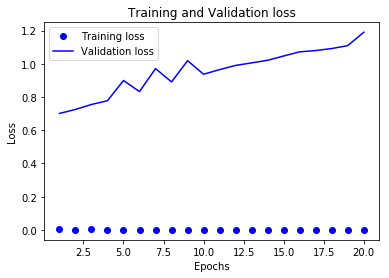

In [57]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

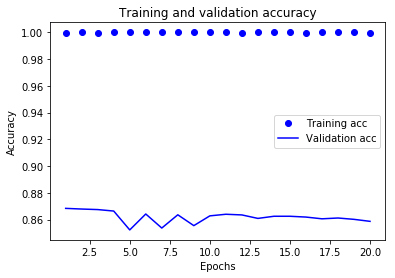

In [58]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.4632 - acc: 0.8182
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2659 - acc: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2045 - acc: 0.9274
Epoch 4/4
25000/25000 [==============================] - 1s 59us/step


In [61]:
results

[0.2900802476596832, 0.88556]